# CO<sub>2</sub> Emissions per Vehicle: Multiple Linear Regression
## Summary
This is the second part of the 'CO<sub>2</sub> Emissions per Vehicle' analysis in which we will be attempting to find a model that best fits our <a href="https://github.com/tabburn/CO2-emissions-by-vehicle/blob/main/resources/2023fuelconsumptionCO2.csv">data</a> (provided by the Canadian government) in order to predict emissions of future vehicles. In this section we'll be taking a look at multiple linear regression. We will explore relationships between features and compare how our different models perform.
## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
LR = linear_model.LinearRegression()

In [2]:
df = pd.read_csv(r'.\resources\2023fuelconsumptionCO2.csv')

In [3]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS', 'CO2_rating'],
      dtype='object')

In [4]:
# changing column names from uppercase to lowercase for convenience
df.columns = df.columns.str.lower()

In [5]:
# extracting specific columns and assigning to a new dataframe
cdf = df[['enginesize', 'cylinders', 'fuelconsumption_city', 'fuelconsumption_hwy', 'fuelconsumption_comb', 'co2emissions']]
cdf.head()

,enginesize,cylinders,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,co2emissions
0,1.5,4,7.9,6.3,7.2,167
1,1.5,4,8.1,6.5,7.4,172
2,1.5,4,8.9,6.5,7.8,181
3,3.5,6,12.6,9.4,11.2,263
4,3.0,6,13.8,11.2,12.4,291


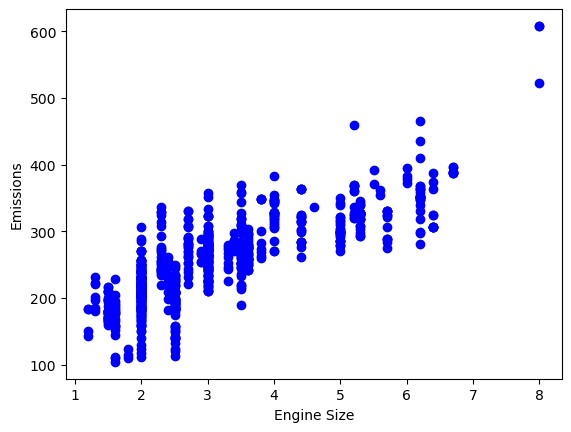

In [6]:
# observing the distribution of the data using 'enginesize'
plt.scatter(cdf.enginesize, cdf.co2emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

## Splitting and Training
We'll begin the MLR by splitting the dataset into training and testing sets for our model. We'll split the dataset randomly using np.random.rand() with 80% of the dataset being using for training and 20% for testing. To do this we'll create a mask that accounts for a random 80% chunk of our dataframe and assign it to a 'train' set then use the rest for our 'test' set (20%).

In [7]:
# splitting the data 80:20
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

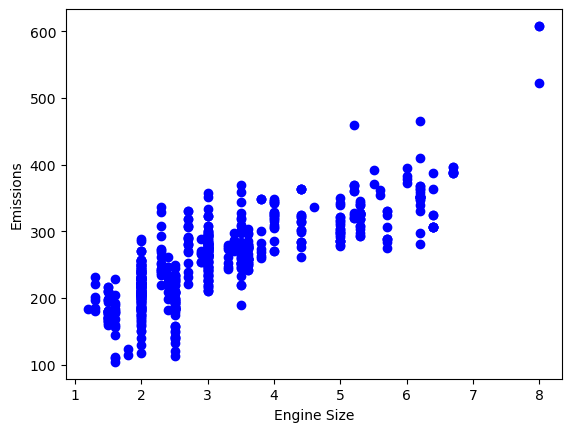

In [8]:
# observing the distribution of the training data using 'enginesize'
plt.scatter(train.enginesize, train.co2emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

## Modeling
As we saw in our exploration of the data using simple linear regression, there are multiple variables that impact CO<sub>2</sub> emissions. Because of this we'll use multiple linear regression. Again, we'll model the data using the 'sci-kit learn' library which I've imported in the first section.
### Model 1

In [9]:
# setting our independent variables
x = np.asanyarray(train[['enginesize', 'cylinders', 'fuelconsumption_comb']])
y = np.asanyarray(train[['co2emissions']])

# fitting the model
LR.fit(x, y)

# printing the coefficients
print(f'Coefficients: {LR.coef_}')

Coefficients: [[-0.32252503  3.56495618 19.76394297]]


Next we'll make our predictions.

In [10]:
# making predictions
y_hat = LR.predict(train[['enginesize', 'cylinders', 'fuelconsumption_comb']])
x = np.asanyarray(train[['enginesize', 'cylinders', 'fuelconsumption_comb']])
y = np.asanyarray(train[['co2emissions']])

print(f'The residual sum of squares (RSS) is: {np.mean((y_hat - y)**2)}')
print(f'The variance score is: {LR.score(x, y)}')

The residual sum of squares (RSS) is: 235.79029836039686
The variance score is: 0.9423087058481321


Given that the best variance score we could possibly have is 1, this multiple regression model seems to be capturing variation very well. Now let's compare it with another MLR model that uses different attributes.
### Model 2
For the next model we will use 'fuelconsumption_city', 'fuelconsumption_hwy', and 'fuelconsumption_comb' as our attributes.

In [11]:
# setting our independent variables
x = np.asanyarray(train[['fuelconsumption_city', 'fuelconsumption_hwy', 'fuelconsumption_comb']])
y = np.asanyarray(train[['co2emissions']])

# fitting the model
LR.fit(x, y)

#printing the coefficients
print(f'The coefficients are: {LR.coef_}')

The coefficients are: [[13.32805544  8.46022112 -0.67301752]]


In [12]:
y_hat = LR.predict(train[['fuelconsumption_city', 'fuelconsumption_hwy', 'fuelconsumption_comb']])
x = np.asanyarray(train[['fuelconsumption_city', 'fuelconsumption_hwy', 'fuelconsumption_comb']])
y = np.asanyarray(train[['co2emissions']])

print(f'The residual sum of squares (RSS) is: {np.mean((y_hat - y)**2)}')
print(f'The variance score is: {LR.score(x, y)}')

The residual sum of squares (RSS) is: 247.47299591752915
The variance score is: 0.9394502763625149


## Model Evaluation
The variance scores of both models are great and very similar with a score of 0.95 for either one, however the first model predicts the values more accurately with a RSS score of 185 compared to the second model's RSS score of 191. In the next section of the data analysis we'll explore polynomial regression.

*Data analysis continued in <a href="https://github.com/tabburn/CO2-emissions-by-vehicle/blob/main/polynomial-regression.ipynb">'CO<sub>2</sub> Emissions per Vehicle: Polynomial Regression'</a>.*